In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


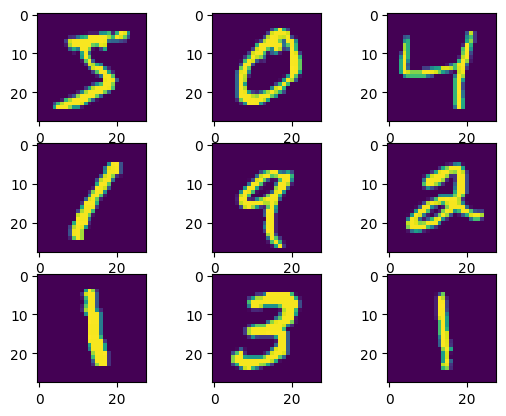

In [3]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [4]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
model = tf.keras.models.Sequential()


In [6]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 2nd hidden layer

In [8]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=100)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8166 - loss: 0.6606
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9522 - loss: 0.1612
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9681 - loss: 0.1071
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9762 - loss: 0.0784
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9817 - loss: 0.0582
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9865 - loss: 0.0440
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9885 - loss: 0.0375
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9907 - loss: 0.0296
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9939 - loss: 0.0211
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9952 - loss: 0.0174


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.1073
0.0934240072965622
0.9747999906539917


In [13]:
prediction = model.predict([X_test])
prediction

 49/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


array([[9.53627663e-11, 7.79954434e-10, 1.57090184e-07, ...,
        9.99064803e-01, 1.41686951e-09, 3.40253181e-09],
       [3.38961444e-13, 3.93132177e-05, 9.99960601e-01, ...,
        1.17493863e-14, 4.19376270e-11, 3.19011861e-18],
       [2.27002930e-10, 9.99985039e-01, 2.17996217e-06, ...,
        1.12674934e-05, 9.09388405e-07, 4.21483737e-10],
       ...,
       [6.07193115e-13, 2.17642580e-08, 1.54113419e-12, ...,
        4.25774346e-07, 1.29951094e-09, 4.17623005e-06],
       [1.36993186e-11, 1.64196590e-11, 1.62423699e-10, ...,
        8.61748450e-09, 3.14194381e-06, 1.17923995e-11],
       [5.24651329e-12, 7.48212636e-13, 1.02970870e-11, ...,
        2.80175523e-16, 7.70296966e-13, 1.77268825e-17]], dtype=float32)

In [14]:
print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [9.9995154e-01 3.2363495e-10 4.7439858e-05 3.0963650e-12 4.9348427e-14
 3.5302499e-08 5.6214236e-07 3.4665794e-07 2.4072820e-13 1.2711379e-09]


Prediction:  0


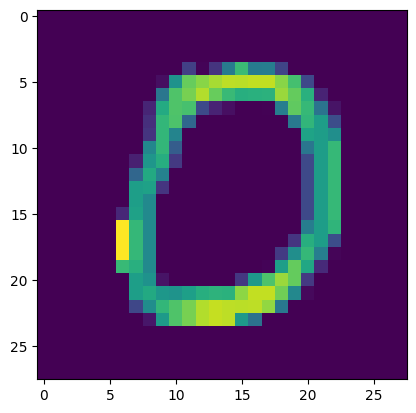

In [15]:
plt.imshow(X_test[10])
plt.show()